<a href="https://colab.research.google.com/github/nish700/Visualization/blob/main/Interactive_Visualizing_on_the_Global_Deforestation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***Deforestation has a major impact on Global warmimg. Knowing about the deforestation status across the globe can help us to mitigate the risk and also control/minimise it by identifying the root cause of the reducing forest cover ***

Data Source : https://ourworldindata.org/deforestation

## Importing the dependencies

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the deforestation data

In [ ]:
#upload the dataset
deforest_data = pd.read_excel('/content/deforestation_data.xlsx')

## Analyse the dataset

In [ ]:
#check the shape
deforest_data.shape

(89, 10)

In [ ]:
#print the top 5 records
deforest_data.head()

,Country,Primary forest extent (2018),Primary / Total tree cover (2018),Primary forest loss (2001-2018),% loss\n(2001-2018),Total tree cover (2018),% tree cover (2018),Tree cover loss (2001-2018),iso_alpha,iso_num
0,Angola,2346961,0.05,110516,0.045,52074907,0.417,2569542,AGO,24
1,Antigua and Barbuda,55,0.00,4,0.066,19682,0.444,678,ATG,28
2,Aruba,7,0.28,1,0.090,24,0.001,2,ABW,533
3,Bahamas,9709,0.03,1557,0.138,331579,0.244,19264,BHS,44
4,Bangladesh,90441,0.04,6180,0.064,2107119,0.151,149751,BGD,50


## Dataset Preprocessing

In [ ]:
#check for null records
deforest_data.isna().sum()

Country                              0
Primary forest extent (2018)         0
Primary / Total tree cover (2018)    0
Primary forest loss (2001-2018)      0
% loss\n(2001-2018)                  0
Total tree cover (2018)              0
% tree cover (2018)                  0
Tree cover loss (2001-2018)          0
iso_alpha                            0
iso_num                              0
dtype: int64

In [ ]:
#change the decimal values to percentage
deforest_data_1 = deforest_data.sort_values('% tree cover (2018)').reset_index()
deforest_data_1['% tree cover (2018)'] = deforest_data_1['% tree cover (2018)'] * 100
deforest_data_1['Primary / Total tree cover (2018)'] = deforest_data_1['Primary / Total tree cover (2018)'] * 100
deforest_data_1['% loss\n(2001-2018)'] = deforest_data_1['% loss\n(2001-2018)'] * 100

## Plotting Visualizations

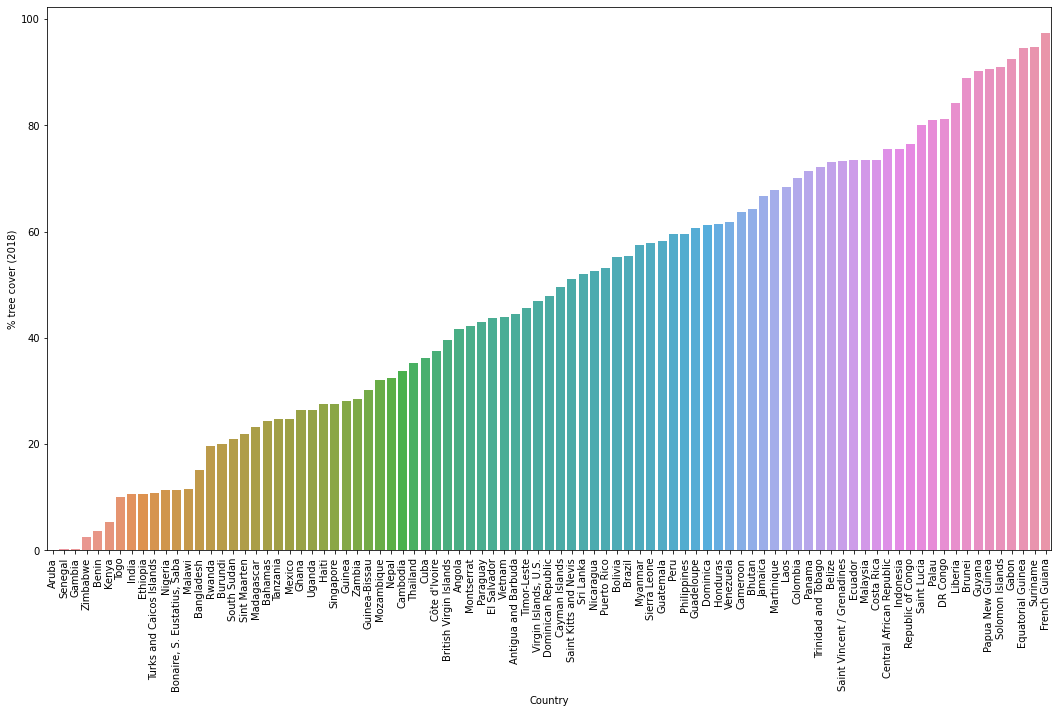

In [ ]:
#plotting bar plot for tree cover
plt.figure(figsize=(18,10))
sns.barplot(x='Country' , y='% tree cover (2018)', data=deforest_data_1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
deforest_data_2 = deforest_data_1.sort_values('Primary / Total tree cover (2018)').reset_index()

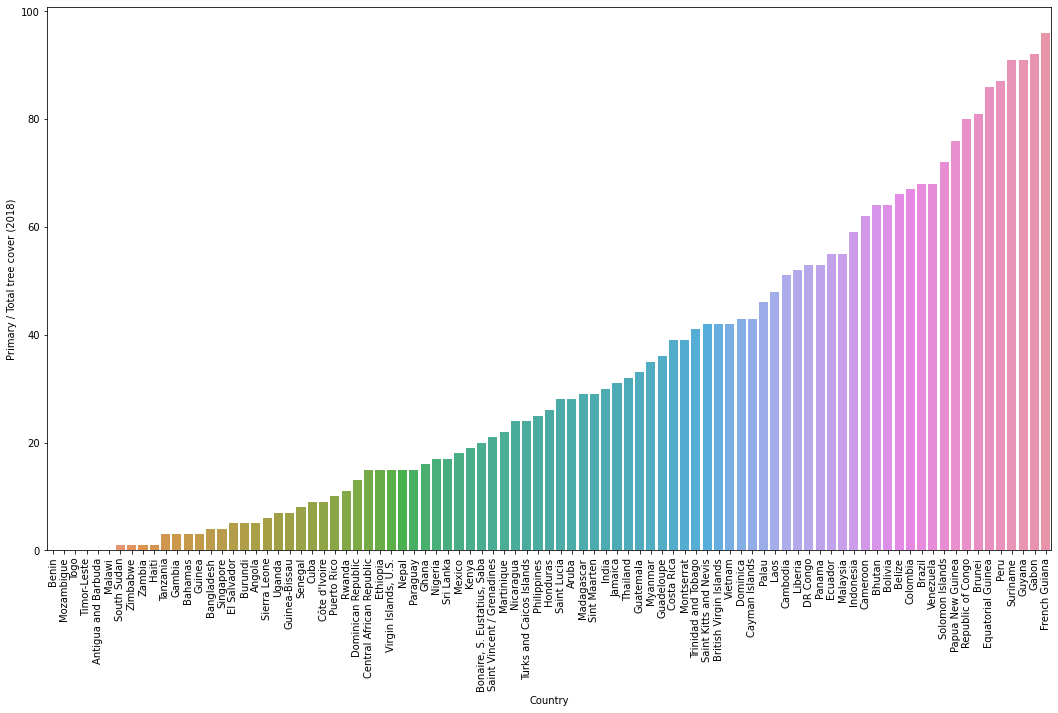

In [ ]:
#plotting bar plot for tree cover
plt.figure(figsize=(18,10))
sns.barplot(x='Country' , y='Primary / Total tree cover (2018)', data=deforest_data_2)
plt.xticks(rotation=90)
plt.show()

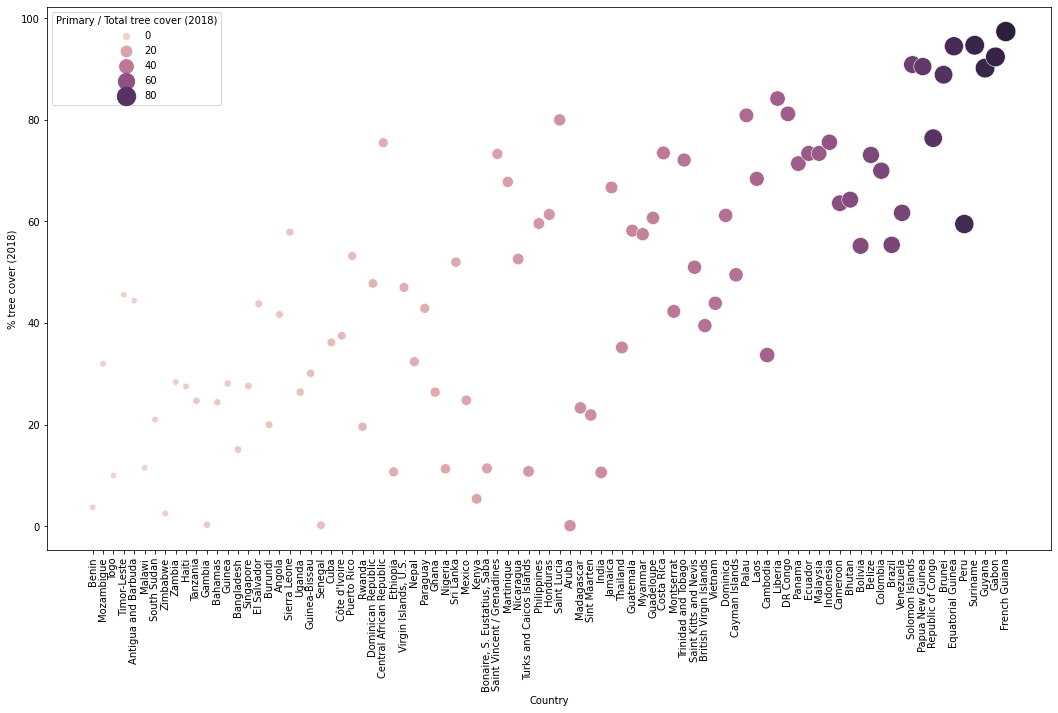

In [ ]:
 plt.figure(figsize=(18,10))
 sns.scatterplot(data = deforest_data_2 , x = 'Country', y='% tree cover (2018)', size='Primary / Total tree cover (2018)',
                 hue='Primary / Total tree cover (2018)',
                 sizes=(40,400))
 plt.xticks(rotation=90)
 plt.show()

### Visualization using dash

In [ ]:
!pip install dash pandas

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

In [ ]:
app = dash.Dash()

In [ ]:
deforest_data_2.head(1)

,level_0,index,Country,Primary forest extent (2018),Primary / Total tree cover (2018),Primary forest loss (2001-2018),% loss\n(2001-2018),Total tree cover (2018),% tree cover (2018),Tree cover loss (2001-2018),iso_alpha,iso_num
0,4,6,Benin,1848,0.0,23,1.2,423104,3.7,33643,BEN,204


In [ ]:
fig = px.scatter(
    deforest_data_2, 
    x = 'Country',
    y= '% tree cover (2018)',
    size='Primary / Total tree cover (2018)',
    color='Primary / Total tree cover (2018)',
    hover_name = 'Country',
    log_x = True,
    size_max= 60
)

app.layout = html.Div([dcc.Graph(id="Country wise tree cover", figure= fig)])

if __name__=="__main__":
  app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


### Visualization using Chloropleth

In [ ]:
px.choropleth(deforest_data_2, locations='iso_alpha',hover_name='Country',color='% loss\n(2001-2018)', height=700)

### Plotting the animated scatter plot

In [ ]:
px.scatter(deforest_data_2, x ='% tree cover (2018)', y= 'Primary / Total tree cover (2018)', size = '% loss\n(2001-2018)', size_max= 65,
           animation_frame = 'Primary / Total tree cover (2018)', animation_group = '% tree cover (2018)',
           color = 'Country', range_y = [-20,100], hover_name='Country',hover_data = deforest_data_2.columns,height=700)